# Computational Theory Tasks
## By Luke Corcoran
### G00410404

In [201]:
# Define necessary imports

# Task 1: Binary Representations
This task involves creating functions to manipulate binary representations of 32-bit unsigned integers.

**Sources:**
- Rotating bits of a number in Python: https://www.geeksforgeeks.org/python3-program-to-rotate-bits-of-a-number/

## Function 1: rotl(x, n=1) (Left Rotation)
The `rotl` function performs a left rotation on a 32-bit unsigned integer. Left rotation shifts bits to the left by `n` positions, wrapping around the bits that overflow beyond the 32-bit boundary.
### Example I/O: 
**Input:**  
```
x = 0b110010101011
n = 3
```

**Output:** 
``` 
0b010101100000
```

In [202]:
# Rotate bits of x to the left by n positions.
def rotl(x, n=1):
    bits = 32 # Number of bits in an integer
    n = n % bits  # Ensure n is within the range of 0-31
    return ((x << n) & 0xFFFFFFFF) | (x >> (bits - n)) # Rotate bits to the left by n positions

### Example Usage:

In [203]:
x = 0b110010101011  # Example binary number
n = 3  # Number of positions to rotate
result = rotl(x, n)  # Compute left rotation

print(f"Input: x = {bin(x)}, n = {n}")  # Print input values
print(f"Output: {bin(result)}")  # Print output of rotl function

Input: x = 0b110010101011, n = 3
Output: 0b110010101011000


## Test 1

In [204]:
def testRotlBasic():
    x = 0b110010101011  # 3243 in decimal
    n = 3
    expected = 0b110010101011000 & 0xFFFFFFFF  # Left rotation by 3 positions
    result = rotl(x, n)
    
    print(f"Test rotl basic - Input: x = {bin(x)}, n = {n}")
    print(f"Expected: {bin(expected)}")
    print(f"Result:   {bin(result)}")
    print(f"Test passed: {result == expected}")
    assert result == expected, f"Expected {bin(expected)}, got {bin(result)}"
    
testRotlBasic()

Test rotl basic - Input: x = 0b110010101011, n = 3
Expected: 0b110010101011000
Result:   0b110010101011000
Test passed: True


## Test 2

In [205]:
def testRotlFullRotation():
    """Test rotation by a full 32 bits (should return the original value)"""
    x = 0b11001010101110000111  # Some arbitrary value
    result1 = rotl(x, 32)
    result2 = rotl(x, 0)
    
    print(f"Test rotl full rotation - Input: x = {bin(x)}")
    print(f"Original:       {bin(x)}")
    print(f"Rotated by 32:  {bin(result1)}")
    print(f"Rotated by 0:   {bin(result2)}")
    print(f"Test passed: {result1 == x and result2 == x}")
    assert result1 == x, f"32-bit rotation should return original value"
    assert result2 == x, f"0-bit rotation should return original value"
testRotlFullRotation()

Test rotl full rotation - Input: x = 0b11001010101110000111
Original:       0b11001010101110000111
Rotated by 32:  0b11001010101110000111
Rotated by 0:   0b11001010101110000111
Test passed: True


## Function 2: rotr(x, n=1) (Right Rotation)
The `rotr` function performs a right rotation on a 32-bit unsigned integer. Right rotation shifts bits to the right by `n` positions, wrapping around the bits that overflow beyond the 32-bit boundary.
### Example I/O: 
**Input:**  
```
x = 0b110010101011
n = 3
```

**Output:** 
``` 
0b011110010101
```

In [206]:
# Rotate bits of x to the right by n positions.
def rotr(x, n=1):
    bits = 32  # Number of bits in an integer
    n = n % bits  # Ensure n is within the range of 0-31
    return ((x >> n) | (x << (bits - n))) & 0xFFFFFFFF  # Rotate bits to the right by n positions

### Example Usage:

In [207]:
x = 0b110010101011  # Example binary number
n = 3  # Number of positions to rotate
result = rotr(x, n)  # Compute right rotation

print(f"Input: x = {bin(x)}, n = {n}")  # Print input values
print(f"Output: {bin(result)}")  # Print output of rotr function

Input: x = 0b110010101011, n = 3
Output: 0b1100000000000000000000110010101


# Test 1

In [208]:
def testRotrBasic():
    x = 0b110010101011  # 3243 in decimal
    n = 3
    # In a full 32-bit context, right rotation by 3 should put the 3 rightmost bits at the left
    expected = ((x >> 3) | (x << (32 - 3))) & 0xFFFFFFFF
    result = rotr(x, n)
    
    print(f"Test rotr basic - Input: x = {bin(x)}, n = {n}")
    print(f"Expected: {bin(expected)}")
    print(f"Result:   {bin(result)}")
    print(f"Test passed: {result == expected}")
    assert result == expected, f"Expected {bin(expected)}, got {bin(result)}"

testRotrBasic()

Test rotr basic - Input: x = 0b110010101011, n = 3
Expected: 0b1100000000000000000000110010101
Result:   0b1100000000000000000000110010101
Test passed: True


## Test 2

In [209]:
def testRotrFullRotation():
    """Test rotation by a full 32 bits (should return the original value)"""
    x = 0b11001010101110000111  # Some arbitrary value
    result1 = rotr(x, 32)
    result2 = rotr(x, 0)
    
    print(f"Test rotr full rotation - Input: x = {bin(x)}")
    print(f"Original:       {bin(x)}")
    print(f"Rotated by 32:  {bin(result1)}")
    print(f"Rotated by 0:   {bin(result2)}")
    print(f"Test passed: {result1 == x and result2 == x}")
    assert result1 == x, f"32-bit rotation should return original value"
    assert result2 == x, f"0-bit rotation should return original value"

testRotrFullRotation()

Test rotr full rotation - Input: x = 0b11001010101110000111
Original:       0b11001010101110000111
Rotated by 32:  0b11001010101110000111
Rotated by 0:   0b11001010101110000111
Test passed: True


## Function 3: ch(x, y, z) (Bitwise Choice)
The `ch` function selects bits from `y` where `x` has bits set to 1 and from `z` where `x` has bits set to 0.
### Example I/O: 
**Input:**  
```
x = 0b110010101011 
y = 0b101010101010
z = 0b010101010101
```

**Output:**
``` 
0b101000101011
```

In [210]:
# Choose bits from y where x has bits set to 1, and bits from z where x has bits set to 0.
def ch(x, y, z):
    return (x & y) ^ (~x & z)  # Select bits from y where x is 1, otherwise from z

### Example Usage:

In [211]:
# Define binary values for x, y, and z
x = 0b110010101011
y = 0b101010101010 
z = 0b010101010101  
result = ch(x, y, z)  # Compute ch function

print(f"Input: x = {bin(x)}, y = {bin(y)}, z = {bin(z)}")  # Print input values
print(f"Output: {bin(result)}")  # Print output of ch function

Input: x = 0b110010101011, y = 0b101010101010, z = 0b10101010101
Output: 0b100111111110


## Test 1

In [212]:
def testChBasic():
    """Test basic choice function behavior"""
    x = 0b110010101011
    y = 0b101010101010
    z = 0b010101010101
    # ch selects bits from y where x=1, and from z where x=0
    expected = (x & y) ^ (~x & z)
    result = ch(x, y, z)
    
    print(f"Test ch basic - Inputs:")
    print(f"x = {bin(x)}")
    print(f"y = {bin(y)}")
    print(f"z = {bin(z)}")
    print(f"Expected: {bin(expected)}")
    print(f"Result:   {bin(result)}")
    print(f"Test passed: {result == expected}")
    assert result == expected, f"Expected {bin(expected)}, got {bin(result)}"

testChBasic()

Test ch basic - Inputs:
x = 0b110010101011
y = 0b101010101010
z = 0b10101010101
Expected: 0b100111111110
Result:   0b100111111110
Test passed: True


## Test 2

In [213]:
def testChExtremeCases():
    """Test choice function with extreme values (all 0s or all 1s)"""
    # When x is all 1s, output should be exactly y
    xAllOnes = 0xFFFFFFFF
    y = 0b101010101010
    z = 0b010101010101
    result1 = ch(xAllOnes, y, z)
    
    # When x is all 0s, output should be exactly z
    xAllZeros = 0
    result2 = ch(xAllZeros, y, z)
    
    print(f"Test ch extreme cases:")
    print(f"y = {bin(y)}")
    print(f"z = {bin(z)}")
    print(f"When x is all 1s - Expected: {bin(y)}")
    print(f"When x is all 1s - Result:   {bin(result1)}")
    print(f"When x is all 0s - Expected: {bin(z)}")
    print(f"When x is all 0s - Result:   {bin(result2)}")
    print(f"Test passed: {result1 == y and result2 == z}")
    assert result1 == y, f"When x is all 1s, ch(x,y,z) should equal y"
    assert result2 == z, f"When x is all 0s, ch(x,y,z) should equal z"

testChExtremeCases()

Test ch extreme cases:
y = 0b101010101010
z = 0b10101010101
When x is all 1s - Expected: 0b101010101010
When x is all 1s - Result:   0b101010101010
When x is all 0s - Expected: 0b10101010101
When x is all 0s - Result:   0b10101010101
Test passed: True


## Function 4: maj(x, y, z) (Bitwise Majority)

The `maj` function performs a majority vote on the bits of `x`, `y`, and `z`.
The output has a `1` in bit position `i` where at least two of `x`, `y`, and `z` have `1`s in position `i`.
All other output bit positions are `0`.

#### Example I/O:

**Input:**
```
x = 0b110010101011
y = 0b101010101010
z = 0b010101010101
```

**Output:**
```
0b110010101011
```

In [214]:
# Compute the majority vote for each bit position in x, y, and z
def maj(x, y, z):
    return (x & y) | (y & z) | (x & z)  # Majority function: At least two bits must be 1

### Example Usage:

In [215]:
# Define binary values for x, y, and z
x = 0b110010101011
y = 0b101010101010
z = 0b010101010101

result = maj(x, y, z)  # Compute majority function

print(f"Input: x = {bin(x)}, y = {bin(y)}, z = {bin(z)}")  # Print input values
print(f"Output: {bin(result)}")  # Print output of maj function

Input: x = 0b110010101011, y = 0b101010101010, z = 0b10101010101
Output: 0b110010101011


## Test 1

In [216]:
def testMajBasic():
    x = 0b110010101011
    y = 0b101010101010
    z = 0b010101010101
    # maj returns 1 if at least two inputs have 1, otherwise 0
    expected = (x & y) | (y & z) | (x & z)
    result = maj(x, y, z)
    
    print(f"Test maj basic - Inputs:")
    print(f"x = {bin(x)}")
    print(f"y = {bin(y)}")
    print(f"z = {bin(z)}")
    print(f"Expected: {bin(expected)}")
    print(f"Result:   {bin(result)}")
    print(f"Test passed: {result == expected}")
    assert result == expected, f"Expected {bin(expected)}, got {bin(result)}"

testMajBasic()

Test maj basic - Inputs:
x = 0b110010101011
y = 0b101010101010
z = 0b10101010101
Expected: 0b110010101011
Result:   0b110010101011
Test passed: True


## Test 2

In [217]:
def testMajExtremeCases():
    # When any two inputs are all 1s, output should be all 1s
    xAllOnes = 0xFFFFFFFF
    yAllOnes = 0xFFFFFFFF
    z = 0b010101010101
    result1 = maj(xAllOnes, yAllOnes, z)
    
    # When any two inputs are all 0s, output should be all 0s
    xAllZeros = 0
    yAllZeros = 0
    result2 = maj(xAllZeros, yAllZeros, z)
    
    print(f"Test maj extreme cases:")
    print(f"z = {bin(z)}")
    print(f"When x and y are all 1s - Expected: {bin(0xFFFFFFFF)}")
    print(f"When x and y are all 1s - Result:   {bin(result1)}")
    print(f"When x and y are all 0s - Expected: {bin(0)}")
    print(f"When x and y are all 0s - Result:   {bin(result2)}")
    print(f"Test passed: {result1 == 0xFFFFFFFF and result2 == 0}")
    assert result1 == 0xFFFFFFFF, f"When two inputs are all 1s, maj should be all 1s"
    assert result2 == 0, f"When two inputs are all 0s, maj should be all 0s"

testMajExtremeCases()

Test maj extreme cases:
z = 0b10101010101
When x and y are all 1s - Expected: 0b11111111111111111111111111111111
When x and y are all 1s - Result:   0b11111111111111111111111111111111
When x and y are all 0s - Expected: 0b0
When x and y are all 0s - Result:   0b0
Test passed: True


# Task 2: Hash Functions

** suggest why the values 31 and 101 are used.**

In [218]:
def hash(s: str) -> int:
    hashval = 0
    for char in s:
        hashval = ord(char) + 31 * hashval
    return hashval % 101

hash("hello world")  # Example usage of hash function

13

## Test 1

In [219]:
def testHashBasic():
    inputStr = "hello"
    result = hash(inputStr)
    
    # Calculate expected result manually for verification
    expected = 0
    for char in inputStr:
        expected = ord(char) + 31 * expected
    expected = expected % 101
    
    print(f"Test hash basic - Input: '{inputStr}'")
    print(f"Expected hash value: {expected}")
    print(f"Calculated hash value: {result}")
    print(f"Test passed: {result == expected}")
    assert result == expected, f"Expected {expected}, got {result}"

testHashBasic()

Test hash basic - Input: 'hello'
Expected hash value: 17
Calculated hash value: 17
Test passed: True


## Test 2

In [220]:
def testDifferentMultipliers():
    testStr = "hashfunction"
    
    # Function to calculate hash with different multiplier
    def hashWithMultiplier(s, multiplier):
        hashval = 0
        for char in s:
            hashval = ord(char) + multiplier * hashval
        return hashval % 101
    
    # Test a set of multipliers, including 31 and some non-prime values
    multipliers = [1, 2, 10, 31, 32, 33, 64]
    results = {}
    
    for m in multipliers:
        results[m] = hashWithMultiplier(testStr, m)
    
    print("Test hash with different multipliers - Input:", testStr)
    for m, result in results.items():
        print(f"Multiplier {m}: Hash value = {result}")
    
    # Check if all hash values are different (indicating good distribution)
    uniqueValues = len(set(results.values()))
    totalValues = len(results)
    print(f"Unique hash values: {uniqueValues} out of {totalValues}")
    
    # Check specifically if 31 produces a different hash than nearby values
    print(f"31 vs 32 produce different hashes: {results[31] != results[32]}")

testDifferentMultipliers()

Test hash with different multipliers - Input: hashfunction
Multiplier 1: Hash value = 78
Multiplier 2: Hash value = 43
Multiplier 10: Hash value = 33
Multiplier 31: Hash value = 56
Multiplier 32: Hash value = 28
Multiplier 33: Hash value = 17
Multiplier 64: Hash value = 59
Unique hash values: 7 out of 7
31 vs 32 produce different hashes: True


## Test 3

In [221]:
def testDifferentModuli():
    testStrings = ["algorithm", "computer", "science", "python", "hash"]
    
    # Function to calculate hash with different modulus
    def hashWithModulus(s, modulus):
        hashval = 0
        for char in s:
            hashval = ord(char) + 31 * hashval
        return hashval % modulus
    
    # Test a set of moduli, including 101 and some non-prime values
    moduli = [10, 100, 101, 102, 200]
    
    # For each modulus, check how many unique hash values we get for our test strings
    print("Testing different modulus values:")
    for mod in moduli:
        hashValues = [hashWithModulus(s, mod) for s in testStrings]
        uniqueValues = len(set(hashValues))
        
        print(f"Modulus {mod}: {uniqueValues} unique hashes out of {len(testStrings)} strings")
        
        # Additional check: how many buckets are actually used
        if mod <= 101:  # Only check for smaller moduli to keep output manageable
            usedBuckets = set(hashValues)
            print(f"   Used {len(usedBuckets)} out of {mod} possible buckets")

testDifferentModuli()

Testing different modulus values:
Modulus 10: 4 unique hashes out of 5 strings
   Used 4 out of 10 possible buckets
Modulus 100: 5 unique hashes out of 5 strings
   Used 5 out of 100 possible buckets
Modulus 101: 5 unique hashes out of 5 strings
   Used 5 out of 101 possible buckets
Modulus 102: 5 unique hashes out of 5 strings
Modulus 200: 5 unique hashes out of 5 strings


# Task 3: SHA256

In [222]:
def sha256Padding(filePath):
    # Read the file as binary
    try:
        with open(filePath, 'rb') as file:
            data = file.read()
    except Exception as e:
        print(f"Error reading file: {e}")
        return
        
    # Calculate original length in bits
    originalLength = len(data) * 8
    
    # Step 1: Append the bit '1' (0x80) to the message
    paddedData = bytearray(data)
    paddedData.append(0x80)
    
    # Step 2: Append 0 bits until message length is 448 mod 512
    while (len(paddedData) * 8) % 512 != 448:
        paddedData.append(0x00)
    
    # Step 3: Append length as a 64-bit big-endian integer
    lengthBytes = originalLength.to_bytes(8, "big")
    paddedData.extend(lengthBytes)
    
    # Extract the padding (everything after the original data)
    padding = paddedData[len(data):]
    
    # Print the padding in hex format with spaces between bytes
    paddingHex = " ".join(f"{byte:02x}" for byte in padding)
    print(paddingHex)

## Make method to create a temporary file

In [223]:
import tempfile

def createTestFile(content):
    """Create a temporary file with the given content and return its path"""
    with tempfile.NamedTemporaryFile(delete=False) as temp:
        if isinstance(content, str):
            temp.write(content.encode('utf-8'))
        else:
            temp.write(content)
        return temp.name

## Test 1

In [224]:
import os

def testAbcExample():
    content = "abc"
    
    # Create a temporary file with content "abc"
    filePath = createTestFile(content)
    
    print(f"Testing with content: '{content}' (3 bytes = 24 bits)")
    print(f"Expected result from specification:")
    print("80 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00")
    print("00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00")
    print("00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 18")
    print("\nYour function output:")
    
    # Call your sha256Padding function
    sha256Padding(filePath)
    
    # Clean up temporary file
    os.unlink(filePath)

testAbcExample()

Testing with content: 'abc' (3 bytes = 24 bits)
Expected result from specification:
80 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 18

Your function output:
80 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 18


## Test 2

In [225]:
# Test 2: Empty message (0 bytes) - edge case
def testEmptyMessage():
    content = ""
    
    # Create a temporary file with empty content
    filePath = createTestFile(content)
    
    print(f"Testing with an empty message (0 bytes = 0 bits)")
    print("Expected pattern: 0x80 byte + zero padding + 8-byte length field with value 0")
    print("\nYour function output:")
    
    # Call your sha256Padding function
    sha256Padding(filePath)
    
    print("\nAnalysis:")
    print("- For an empty message, the padding should start with 0x80")
    print("- The length field (last 8 bytes) should be all zeros")
    print("- Total padded length should be exactly 64 bytes (512 bits)")
    
    # Clean up temporary file
    os.unlink(filePath)

testEmptyMessage()

Testing with an empty message (0 bytes = 0 bits)
Expected pattern: 0x80 byte + zero padding + 8-byte length field with value 0

Your function output:
80 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00

Analysis:
- For an empty message, the padding should start with 0x80
- The length field (last 8 bytes) should be all zeros
- Total padded length should be exactly 64 bytes (512 bits)


## Test 3

In [226]:
def test55Bytes():
    content = "a" * 55
    
    # Create a temporary file with 55 'a' characters
    filePath = createTestFile(content)
    
    print(f"Testing with content: 55 'a' characters (55 bytes = 440 bits)")
    print("Expected pattern: 0x80 byte + 8-byte length field with value 440 (0x1B8)")
    print("\nYour function output:")
    
    # Call your sha256Padding function
    sha256Padding(filePath)
    
    print("\nAnalysis:")
    print("- This is a special case: 55 bytes + 1 byte (0x80) + 8 bytes (length) = 64 bytes")
    print("- This is the maximum message size that fits in a single block with padding")
    print("- The length field should represent 440 bits (0x01B8)")
    print("- This message requires minimal padding (just 9 bytes)")
    
    # Clean up temporary file
    os.unlink(filePath)

test55Bytes()

Testing with content: 55 'a' characters (55 bytes = 440 bits)
Expected pattern: 0x80 byte + 8-byte length field with value 440 (0x1B8)

Your function output:
80 00 00 00 00 00 00 01 b8

Analysis:
- This is a special case: 55 bytes + 1 byte (0x80) + 8 bytes (length) = 64 bytes
- This is the maximum message size that fits in a single block with padding
- The length field should represent 440 bits (0x01B8)
- This message requires minimal padding (just 9 bytes)


## Test 4

In [227]:
# Test 4: Message of 56 bytes (requires additional block for padding)
def test56Bytes():
    content = "a" * 56
    
    # Create a temporary file with 56 'a' characters
    filePath = createTestFile(content)
    
    print(f"Testing with content: 56 'a' characters (56 bytes = 448 bits)")
    print("Expected pattern: 0x80 byte + many zero bytes + 8-byte length field with value 448 (0x1C0)")
    print("\nYour function output:")
    
    # Call your sha256Padding function
    sha256Padding(filePath)
    
    print("\nAnalysis:")
    print("- This is the threshold case: 56 bytes doesn't fit in a single block with padding")
    print("- 56 bytes + 1 byte (0x80) + 8 bytes (length) = 65 bytes, which exceeds 64 bytes")
    print("- The padding should include 0x80 followed by many zeros")
    print("- The length field should represent 448 bits (0x01C0)")
    print("- The padded message will require 2 full 512-bit blocks")
    
    # Clean up temporary file
    os.unlink(filePath)

test56Bytes()

Testing with content: 56 'a' characters (56 bytes = 448 bits)
Expected pattern: 0x80 byte + many zero bytes + 8-byte length field with value 448 (0x1C0)

Your function output:
80 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 01 c0

Analysis:
- This is the threshold case: 56 bytes doesn't fit in a single block with padding
- 56 bytes + 1 byte (0x80) + 8 bytes (length) = 65 bytes, which exceeds 64 bytes
- The padding should include 0x80 followed by many zeros
- The length field should represent 448 bits (0x01C0)
- The padded message will require 2 full 512-bit blocks


## Test 5

In [228]:
def test64Bytes():
    content = "a" * 64
    
    # Create a temporary file with 64 'a' characters
    filePath = createTestFile(content)
    
    print(f"Testing with content: 64 'a' characters (64 bytes = 512 bits)")
    print("Expected pattern: 0x80 byte + many zero bytes + 8-byte length field with value 512 (0x200)")
    print("\nYour function output:")
    
    # Call your sha256Padding function
    sha256Padding(filePath)
    
    print("\nAnalysis:")
    print("- The original message is exactly one block (64 bytes)")
    print("- When a message is exactly a multiple of the block size, an entire additional block is needed")
    print("- The padding should include 0x80 followed by zeros to fill the block")
    print("- The length field should represent 512 bits (0x0200)")
    print("- The padded message will require 2 full 512-bit blocks")
    
    # Clean up temporary file
    os.unlink(filePath)

test64Bytes()

Testing with content: 64 'a' characters (64 bytes = 512 bits)
Expected pattern: 0x80 byte + many zero bytes + 8-byte length field with value 512 (0x200)

Your function output:
80 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 02 00

Analysis:
- The original message is exactly one block (64 bytes)
- When a message is exactly a multiple of the block size, an entire additional block is needed
- The padding should include 0x80 followed by zeros to fill the block
- The length field should represent 512 bits (0x0200)
- The padded message will require 2 full 512-bit blocks


## Task 4: Prime Numbers

### 1. Trial Division

In [229]:
def trialDivisionPrimes(n):
    primes = []
    num = 2
    while len(primes) < n:
        isPrime = True
        i = 2
        while i * i <= num: 
            if num % i == 0:
                isPrime = False
                break
            i += 1
        if isPrime:
            primes.append(num)
        num += 1
    return primes

## Test 1

In [230]:
def testTrialDivisionBasic(n=10):
    primes = trialDivisionPrimes(n)
    print(f"First {n} primes using Trial Division:")
    print(primes)
    if n >= 10:
        print(f"The 10th prime number is: {primes[9]}")

testTrialDivisionBasic(10)

First 10 primes using Trial Division:
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]
The 10th prime number is: 29


## Test 2

In [231]:
def testTrialDivisionProcess(num=17):
    isPrime = True
    i = 2
    divisorsChecked = []
    
    print(f"Testing if {num} is prime using Trial Division:")
    print(f"Checking divisors up to sqrt({num}) = {int(num**0.5)}")
    
    while i * i <= num:
        divisorsChecked.append(i)
        if num % i == 0:
            isPrime = False
            print(f"  {i} divides {num} evenly ({num} = {i} × {num//i})")
            break
        i += 1
    
    if isPrime:
        print(f"{num} is prime! No divisors found among {divisorsChecked}.")
    else:
        print(f"{num} is not prime because it's divisible by {i}.")
    
testTrialDivisionProcess(17)  # Test with a prime
testTrialDivisionProcess(15)  # Test with a non-prime

Testing if 17 is prime using Trial Division:
Checking divisors up to sqrt(17) = 4
17 is prime! No divisors found among [2, 3, 4].
Testing if 15 is prime using Trial Division:
Checking divisors up to sqrt(15) = 3
  3 divides 15 evenly (15 = 3 × 5)
15 is not prime because it's divisible by 3.


## Test 3

In [232]:
def testTrialDivisionDivisorCount():
    testNumbers = [10, 17, 100, 101, 1000, 1009]
    
    results = []
    for num in testNumbers:
        divisorsChecked = 0
        isPrime = True
        
        # Trial division process
        i = 2
        while i * i <= num:
            divisorsChecked += 1
            if num % i == 0:
                isPrime = False
                break
            i += 1
        
        results.append({
            'number': num,
            'isPrime': isPrime,
            'divisorsChecked': divisorsChecked,
            'maxPossibleDivisors': int(num**0.5) - 1
        })
    
    # Display results
    print("Trial Division Key Characteristic: Divisor Checking")
    print("-------------------------------------------------")
    print("Number | Prime? | Divisors Checked | Max Possible")
    print("-------------------------------------------------")
    
    for r in results:
        print(f"{r['number']:6d} | {str(r['isPrime']):6s} | {r['divisorsChecked']:16d} | {r['maxPossibleDivisors']:12d}")

testTrialDivisionDivisorCount()

Trial Division Key Characteristic: Divisor Checking
-------------------------------------------------
Number | Prime? | Divisors Checked | Max Possible
-------------------------------------------------
    10 | False  |                1 |            2
    17 | True   |                3 |            3
   100 | False  |                1 |            9
   101 | True   |                9 |            9
  1000 | False  |                1 |           30
  1009 | True   |               30 |           30


## Test 4

In [233]:
def testTrialDivisionGapImpact():
    seqLengths = [20, 20, 20]
    startingPoints = [1, 1000, 10000]
    
    print("Trial Division and Prime Gaps")
    print("-------------------------------------------------")
    
    for length, start in zip(seqLengths, startingPoints):
        primesFound = 0
        numbersChecked = 0
        maxGap = 0
        currentGap = 0
        num = start
        
        # Find primes in range
        while primesFound < length:
            isPrime = True
            i = 2
            divisorChecks = 0
            
            while i * i <= num:
                divisorChecks += 1
                if num % i == 0:
                    isPrime = False
                    break
                i += 1
            
            if isPrime:
                if primesFound > 0:
                    maxGap = max(maxGap, currentGap)
                currentGap = 0
                primesFound += 1
            else:
                currentGap += 1
            
            numbersChecked += 1
            num += 1
        
        end = num - 1
        
        print(f"\nFinding {length} primes from {start} to {end}:")
        print(f"Numbers checked: {numbersChecked}")
        print(f"Prime density: {length/numbersChecked:.2%}")
        print(f"Largest gap between primes: {maxGap}")
        print(f"Average checks per number: {numbersChecked/length:.2f}")

testTrialDivisionGapImpact()

Trial Division and Prime Gaps
-------------------------------------------------

Finding 20 primes from 1 to 67:
Numbers checked: 67
Prime density: 29.85%
Largest gap between primes: 5
Average checks per number: 3.35

Finding 20 primes from 1000 to 1123:
Numbers checked: 124
Prime density: 16.13%
Largest gap between primes: 17
Average checks per number: 6.20

Finding 20 primes from 10000 to 10169:
Numbers checked: 170
Prime density: 11.76%
Largest gap between primes: 27
Average checks per number: 8.50


### 2.  Sieve of Eratosthenes

In [234]:
def sieveOfEratosthenes(n):
    limit = 550 
    sieve = [True] * (limit + 1)
    sieve[0] = sieve[1] = False
    start = 2
    while start * start <= limit:
        if sieve[start]:
            multiple = start * start
            while multiple <= limit:
                sieve[multiple] = False
                multiple += start
        start += 1
    primes = [num for num, prime in enumerate(sieve) if prime]
    return primes[:n]

## Test 1

In [235]:
def testSieveCrossouts():
    limit = 50
    sieve = [True] * (limit + 1)
    sieve[0] = sieve[1] = False
    
    # Track which numbers were crossed out by which prime
    crossoutSource = {}
    
    # For visualization, track the state after each prime's processing
    states = []
    states.append(sieve.copy())
    
    # Process the sieve
    for p in range(2, int(limit**0.5) + 1):
        if sieve[p]:
            crossedOut = []
            
            # Mark all multiples of p as composite
            for multiple in range(p*p, limit+1, p):
                if sieve[multiple]:  # Only count if not already crossed out
                    crossedOut.append(multiple)
                    crossoutSource[multiple] = p
                sieve[multiple] = False
            
            states.append(sieve.copy())
            print(f"Prime {p}: crossed out {len(crossedOut)} multiples: {crossedOut}")
    
    # Display final results
    remainingPrimes = [i for i, isPrime in enumerate(sieve) if isPrime]
    print(f"\nAll primes up to {limit}: {remainingPrimes}")
    
    # Calculate efficiency
    totalCrossouts = len(crossoutSource)
    uniqueCrossouts = len(set(crossoutSource.keys()))
    totalNumbers = limit - 2 + 1  # Count from 2 to limit
    
    print(f"\nSieve Efficiency:")
    print(f"Total numbers processed: {totalNumbers}")
    print(f"Numbers marked as composite: {uniqueCrossouts}")
    print(f"Total crossing-out operations: {totalCrossouts}")

testSieveCrossouts()

Prime 2: crossed out 24 multiples: [4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50]
Prime 3: crossed out 7 multiples: [9, 15, 21, 27, 33, 39, 45]
Prime 5: crossed out 2 multiples: [25, 35]
Prime 7: crossed out 1 multiples: [49]

All primes up to 50: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]

Sieve Efficiency:
Total numbers processed: 49
Numbers marked as composite: 34
Total crossing-out operations: 34


## Test 2

In [236]:
def testSieveMemoryUsage():
    testLimits = [100, 1000, 10000]
    results = []
    
    for limit in testLimits:
        # Create sieve
        sieve = [True] * (limit + 1)
        sieve[0] = sieve[1] = False
        
        for p in range(2, int(limit**0.5) + 1):
            if sieve[p]:
                for multiple in range(p*p, limit+1, p):
                    sieve[multiple] = False
        
        # Count primes found
        primes = [num for num, isPrime in enumerate(sieve) if isPrime]
        
        results.append({
            'limit': limit,
            'memorySize': limit + 1,
            'primesFound': len(primes),
            'memoryPerPrime': (limit + 1) / len(primes)
        })
    
    # Display results
    print("Sieve of Eratosthenes Memory Usage")
    print("-------------------------------------------------")
    print("Limit | Array Size | Primes Found | Memory per Prime")
    print("-------------------------------------------------")
    
    for r in results:
        print(f"{r['limit']:6d} | {r['memorySize']:10d} | {r['primesFound']:12d} | {r['memoryPerPrime']:16.2f}")
    

testSieveMemoryUsage()

Sieve of Eratosthenes Memory Usage
-------------------------------------------------
Limit | Array Size | Primes Found | Memory per Prime
-------------------------------------------------
   100 |        101 |           25 |             4.04
  1000 |       1001 |          168 |             5.96
 10000 |      10001 |         1229 |             8.14


## Test 3

In [237]:
def testSieveVsRange():
    # Test ranges
    ranges = [(2, 100), (100, 200), (1000, 1100)]
    
    print("Finding All Primes in Different Ranges")
    print("-------------------------------------------------")
    
    for start, end in ranges:
        # Create sieve
        sieve = [True] * (end + 1)
        sieve[0] = sieve[1] = False
        
        # Count operations
        markingOps = 0
        
        for p in range(2, int(end**0.5) + 1):
            if sieve[p]:
                for multiple in range(max(p*p, start + (p - start % p) % p), end+1, p):
                    sieve[multiple] = False
                    markingOps += 1
        
        # Count primes found
        primes = [num for num in range(max(2, start), end+1) if sieve[num]]
        
        print(f"\nRange {start} to {end}:")
        print(f"Range size: {end - start + 1}")
        print(f"Primes found: {len(primes)}")
        print(f"Prime density: {len(primes)/(end-start+1):.2%}")
        print(f"Marking operations: {markingOps}")
        print(f"First few primes: {primes[:5]}...")

testSieveVsRange()

Finding All Primes in Different Ranges
-------------------------------------------------

Range 2 to 100:
Range size: 99
Primes found: 25
Prime density: 25.25%
Marking operations: 104
First few primes: [2, 3, 5, 7, 11]...

Range 100 to 200:
Range size: 101
Primes found: 21
Prime density: 20.79%
Marking operations: 214
First few primes: [101, 103, 107, 109, 113]...

Range 1000 to 1100:
Range size: 101
Primes found: 16
Prime density: 15.84%
Marking operations: 314
First few primes: [1009, 1013, 1019, 1021, 1031]...


## Task 5: Roots

In [238]:
def isPrime(n):
    if n <= 1:
        return False
    if n == 2:
        return True
    if n % 2 == 0:
        return False
    i = 3
    while i * i <= n:
        if n % i == 0:
            return False
        i += 2
    return True

def getFirstNPrimes(n):
    primes = []
    num = 2
    while len(primes) < n:
        if isPrime(num):
            primes.append(num)
        num += 1
    return primes

def sqrtNewton(x, tolerance=1e-15):
    if x == 0:
        return 0
    guess = x / 2.0
    while True:
        nextGuess = (guess + x / guess) / 2
        if abs(nextGuess - guess) < tolerance:
            return nextGuess
        guess = nextGuess

def fractionalBitsOfSqrt(x, bits=32):
    root = sqrtNewton(x)
    frac = root - int(root)
    result = ''
    for _ in range(bits):
        frac *= 2
        bit = int(frac)
        result += str(bit)
        frac -= bit
    return result

def calculateRootFractions(nPrimes=100, bits=32):
    primes = getFirstNPrimes(nPrimes)
    return [fractionalBitsOfSqrt(p, bits) for p in primes]

## Test 1

√2: Newton=1.41421356, Math=1.41421356, Diff=2.22e-16
√3: Newton=1.73205081, Math=1.73205081, Diff=0.00e+00
√5: Newton=2.23606798, Math=2.23606798, Diff=0.00e+00
√7: Newton=2.64575131, Math=2.64575131, Diff=0.00e+00
√11: Newton=3.31662479, Math=3.31662479, Diff=0.00e+00

Binary representation of √7 (first 32 bits):
Binary: 10100101010011111111010100111010
Actual fractional part: 0.6457513110645907
From binary: 0.6457513109780848
Difference: 8.65059135435331e-11


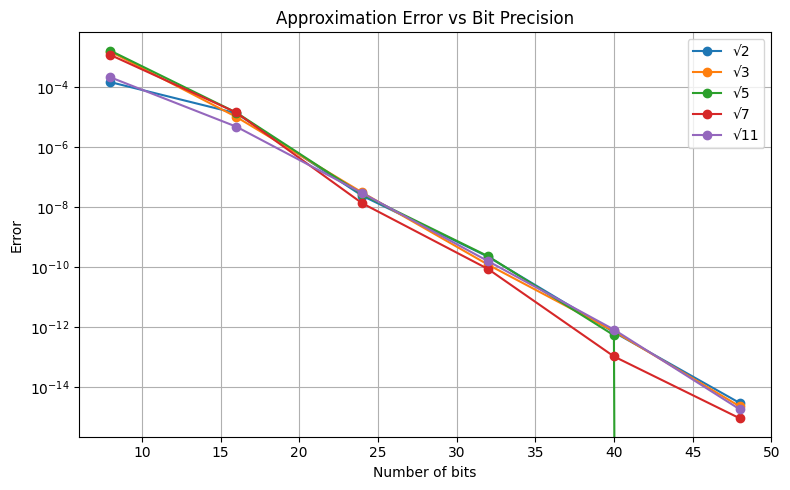

In [239]:
import matplotlib.pyplot as plt
import math

def testBasicFunctionality(plot=True):
    # Test accuracy of Newton method
    testNumbers = [2, 3, 5, 7, 11]
    for num in testNumbers:
        newtonResult = sqrtNewton(num)
        mathResult = math.sqrt(num)
        diff = abs(newtonResult - mathResult)
        print(f"√{num}: Newton={newtonResult:.8f}, Math={mathResult:.8f}, Diff={diff:.2e}")
    
    # Verify binary representation
    prime = 7
    bits = 32
    fracBits = fractionalBitsOfSqrt(prime, bits)
    decimalValue = sum(int(fracBits[i]) * (2 ** -(i + 1)) for i in range(len(fracBits)))
    actualFrac = math.sqrt(prime) - int(math.sqrt(prime))
    
    print(f"\nBinary representation of √{prime} (first 32 bits):")
    print(f"Binary: {fracBits}")
    print(f"Actual fractional part: {actualFrac}")
    print(f"From binary: {decimalValue}")
    print(f"Difference: {abs(actualFrac - decimalValue)}")
    
    if plot:
        # Simple plot showing convergence
        primes = getFirstNPrimes(5)
        plt.figure(figsize=(8, 5))
        for p in primes:
            bitLevels = [8, 16, 24, 32, 40, 48]
            errors = []
            for b in bitLevels:
                binary = fractionalBitsOfSqrt(p, b)
                decimal = sum(int(binary[i]) * (2 ** -(i + 1)) for i in range(len(binary)))
                actual = math.sqrt(p) - int(math.sqrt(p))
                errors.append(abs(actual - decimal))
            plt.semilogy(bitLevels, errors, 'o-', label=f"√{p}")
        
        plt.xlabel("Number of bits")
        plt.ylabel("Error")
        plt.title("Approximation Error vs Bit Precision")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.savefig("test1_error.png")
    
    print()

testBasicFunctionality()

## Test 2

Analyzing 32-bit fractions for 100 primes
Ratio of 1's: 0.5000 (expected: 0.5)

Ratio of 1's by position (first 10):
  Bit 1: 0.4800
  Bit 2: 0.5200
  Bit 3: 0.4800
  Bit 4: 0.4400
  Bit 5: 0.4300
  Bit 6: 0.5000
  Bit 7: 0.5100
  Bit 8: 0.5000
  Bit 9: 0.4400
  Bit 10: 0.4500

Uniformity across bit positions:
  Chi-square: 18.8000, p-value: 0.958162
  Distribution is uniform



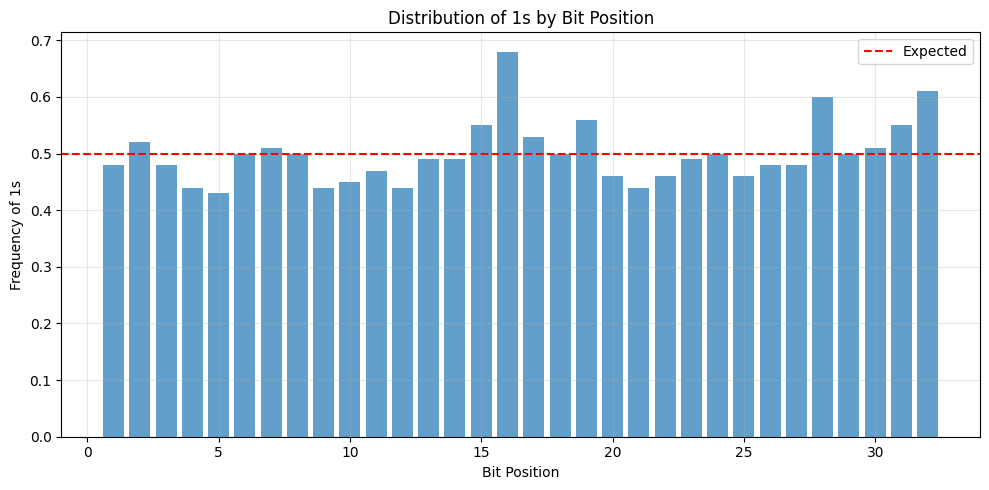

In [240]:
from scipy import stats
import numpy as np

def testBitDistribution(plot=True):  
    numPrimes = 100
    bits = 32
    
    # Get data
    primes = getFirstNPrimes(numPrimes)
    fractions = calculateRootFractions(numPrimes, bits)
    bitArray = np.array([[int(bit) for bit in fraction] for fraction in fractions])
    
    # Overall distribution
    onesCount = np.sum(bitArray)
    totalBits = numPrimes * bits
    onesRatio = onesCount / totalBits
    
    print(f"Analyzing {bits}-bit fractions for {numPrimes} primes")
    print(f"Ratio of 1's: {onesRatio:.4f} (expected: 0.5)")
    
    # Position-based distribution
    onesByPosition = np.sum(bitArray, axis=0) / numPrimes
    
    # Sample of position-specific distribution
    print("\nRatio of 1's by position (first 10):")
    for i in range(10):
        print(f"  Bit {i+1}: {onesByPosition[i]:.4f}")
    
    # Statistical test for uniformity
    chi2, p = stats.chisquare(np.sum(bitArray, axis=0), 
                              [numPrimes/2] * bits)
    
    print(f"\nUniformity across bit positions:")
    print(f"  Chi-square: {chi2:.4f}, p-value: {p:.6f}")
    print(f"  Distribution is {'uniform' if p > 0.05 else 'not uniform'}")
    
    if plot:
        # Visualize bit distribution by position
        plt.figure(figsize=(10, 5))
        plt.bar(range(1, bits+1), onesByPosition, alpha=0.7)
        plt.axhline(y=0.5, color='r', linestyle='--', label='Expected')
        plt.xlabel('Bit Position')
        plt.ylabel('Frequency of 1s')
        plt.title('Distribution of 1s by Bit Position')
        plt.grid(alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.savefig("test3_distribution.png")
    
    print()

testBitDistribution()

## Test 3

Analyzing 3200 bits from 50 primes
Frequency test:
  Ones: 1248 (0.3900)
  Zeros: 1952 (0.6100)
  Chi-square: 154.8800, p-value: 0.000000
  Sequence is not random

Runs test:
  Runs: 1237, Expected: 1523.56
  Z-score: -10.6486, p-value: 0.000000
  Sequence is not random

Pattern frequency (2-bit):
  00: 1333 (1.67x expected)
  01: 618 (0.77x expected)
  10: 618 (0.77x expected)
  11: 630 (0.79x expected)



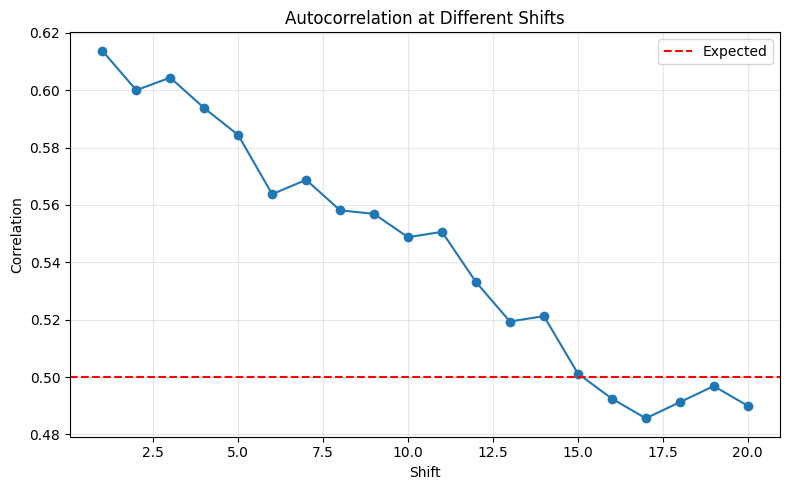

In [241]:
def testRandomnessProperties(plot=True):   
    numPrimes = 50
    bits = 64
    
    # Get data
    fractions = calculateRootFractions(numPrimes, bits)
    allBits = ''.join(fractions)
    
    # Single bit frequency test
    ones = allBits.count('1')
    zeros = allBits.count('0')
    expected = len(allBits) / 2
    
    print(f"Analyzing {len(allBits)} bits from {numPrimes} primes")
    print(f"Frequency test:")
    print(f"  Ones: {ones} ({ones/len(allBits):.4f})")
    print(f"  Zeros: {zeros} ({zeros/len(allBits):.4f})")
    
    # Chi-square test
    chi2 = ((ones - expected)**2 + (zeros - expected)**2) / expected
    pValue = 1 - stats.chi2.cdf(chi2, 1)
    
    print(f"  Chi-square: {chi2:.4f}, p-value: {pValue:.6f}")
    print(f"  Sequence is {'random' if pValue > 0.05 else 'not random'}")
    
    # Runs test
    runs = 1
    for i in range(1, len(allBits)):
        if allBits[i] != allBits[i-1]:
            runs += 1
    
    expectedRuns = 1 + (2 * ones * zeros) / len(allBits)
    stdDev = math.sqrt((2 * ones * zeros * (2 * ones * zeros - len(allBits))) / 
                       (len(allBits)**2 * (len(allBits) - 1)))
    
    zScore = (runs - expectedRuns) / stdDev if stdDev > 0 else 0
    pValueRuns = 2 * (1 - stats.norm.cdf(abs(zScore)))
    
    print(f"\nRuns test:")
    print(f"  Runs: {runs}, Expected: {expectedRuns:.2f}")
    print(f"  Z-score: {zScore:.4f}, p-value: {pValueRuns:.6f}")
    print(f"  Sequence is {'random' if pValueRuns > 0.05 else 'not random'}")
    
    # Patterns test (simplified)
    print("\nPattern frequency (2-bit):")
    patterns = {}
    for i in range(len(allBits) - 1):
        pattern = allBits[i:i+2]
        patterns[pattern] = patterns.get(pattern, 0) + 1
    
    expectedCount = len(allBits) / 4  # Expected count for each 2-bit pattern
    
    for pattern, count in sorted(patterns.items()):
        print(f"  {pattern}: {count} ({count/expectedCount:.2f}x expected)")
    
    if plot:
        # Autocorrelation plot
        shifts = range(1, 21)
        correlations = []
        
        for shift in shifts:
            shifted = allBits[shift:] + allBits[:shift]
            matchRatio = sum(a == b for a, b in zip(allBits, shifted)) / len(allBits)
            correlations.append(matchRatio)
        
        plt.figure(figsize=(8, 5))
        plt.plot(shifts, correlations, 'o-')
        plt.axhline(y=0.5, color='r', linestyle='--', label='Expected')
        plt.xlabel('Shift')
        plt.ylabel('Correlation')
        plt.title('Autocorrelation at Different Shifts')
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.savefig("test4_autocorrelation.png")
    
    print()

testRandomnessProperties()

## Test 4

Analyzing 128-bit sequences for periodicity
√2: No exact periodicity found
  Best autocorrelations: [(1, 0.828125), (4, 0.828125), (5, 0.8125)]
√3: No exact periodicity found
  Best autocorrelations: [(2, 0.796875), (4, 0.796875), (3, 0.78125)]
√5: No exact periodicity found
  Best autocorrelations: [(1, 0.8125), (2, 0.8125), (7, 0.8125)]
√7: No exact periodicity found
  Best autocorrelations: [(2, 0.84375), (5, 0.796875), (7, 0.796875)]
√11: No exact periodicity found
  Best autocorrelations: [(5, 0.828125), (2, 0.8125), (3, 0.8125)]
√13: No exact periodicity found
  Best autocorrelations: [(2, 0.796875), (3, 0.796875), (4, 0.796875)]



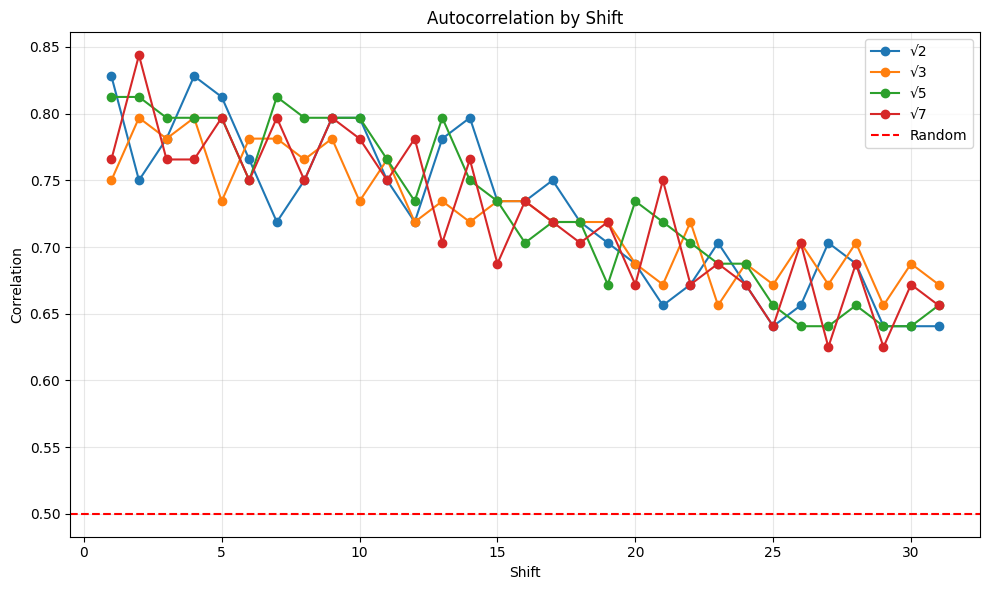

In [242]:
def testPeriodicity(plot=True):
    bits = 128
    primes = [2, 3, 5, 7, 11, 13]
    
    print(f"Analyzing {bits}-bit sequences for periodicity")
    
    # Store results for plotting
    autocorrData = []
    
    for prime in primes:
        fraction = fractionalBitsOfSqrt(prime, bits)
        
        # Check for exact periodic patterns (simple version)
        hasPeriod = False
        
        for period in range(2, min(32, bits//4)):
            matches = True
            for i in range(period, bits - period, period):
                if fraction[0:period] != fraction[i:i+period]:
                    matches = False
                    break
            
            if matches:
                hasPeriod = True
                print(f"√{prime}: Found periodic pattern of length {period}")
                print(f"  Pattern: {fraction[0:period]}")
                break
        
        if not hasPeriod:
            # Check autocorrelation for approximate periodicity
            shifts = range(1, min(33, bits//4))
            bestShifts = []
            
            for shift in shifts:
                correlation = sum(fraction[i] == fraction[(i+shift) % bits] 
                                  for i in range(bits)) / bits
                
                bestShifts.append((shift, correlation))
                autocorrData.append((prime, shift, correlation))
            
            # Report top 3 correlations
            topShifts = sorted(bestShifts, key=lambda x: x[1], reverse=True)[:3]
            
            print(f"√{prime}: No exact periodicity found")
            print(f"  Best autocorrelations: {topShifts}")
    
    if plot and autocorrData:
        # Plot autocorrelation for the first few primes
        plt.figure(figsize=(10, 6))
        for p in primes[:4]:  # First 4 primes for clarity
            primeData = [(s, c) for pr, s, c in autocorrData if pr == p]
            if primeData:
                shifts, corrs = zip(*primeData)
                plt.plot(shifts, corrs, 'o-', label=f"√{p}")
        
        plt.axhline(y=0.5, color='r', linestyle='--', label='Random')
        plt.xlabel('Shift')
        plt.ylabel('Correlation')
        plt.title('Autocorrelation by Shift')
        plt.grid(alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.savefig("test6_periodicity.png")
    
    print()

testPeriodicity()

## Test 5

Testing normality for 10 primes, 64 bits each

Pattern length: 1
  √2:
    Chi-square: 0.5625, p-value: 0.453255
    Normal
  √3:
    Chi-square: 1.5625, p-value: 0.211300
    Normal
  √5:
    Chi-square: 0.2500, p-value: 0.617075
    Normal
  √7:
    Chi-square: 0.2500, p-value: 0.617075
    Normal
  √11:
    Chi-square: 1.5625, p-value: 0.211300
    Normal

Pattern length: 2
  √2:
    Chi-square: 6.5238, p-value: 0.088728
    Normal
  √3:
    Chi-square: 3.2222, p-value: 0.358615
    Normal
  √5:
    Chi-square: 3.8571, p-value: 0.277309
    Normal
  √7:
    Chi-square: 0.9365, p-value: 0.816610
    Normal
  √11:
    Chi-square: 4.4921, p-value: 0.212999
    Normal

Pattern length: 3
  √2:
    Chi-square: 13.3548, p-value: 0.063921
    Normal
  √3:
    Chi-square: 10.7742, p-value: 0.148776
    Normal
  √5:
    Chi-square: 11.2903, p-value: 0.126447
    Normal
  √7:
    Chi-square: 10.7742, p-value: 0.148776
    Normal
  √11:
    Chi-square: 11.8065, p-value: 0.107106
    Normal

Pat

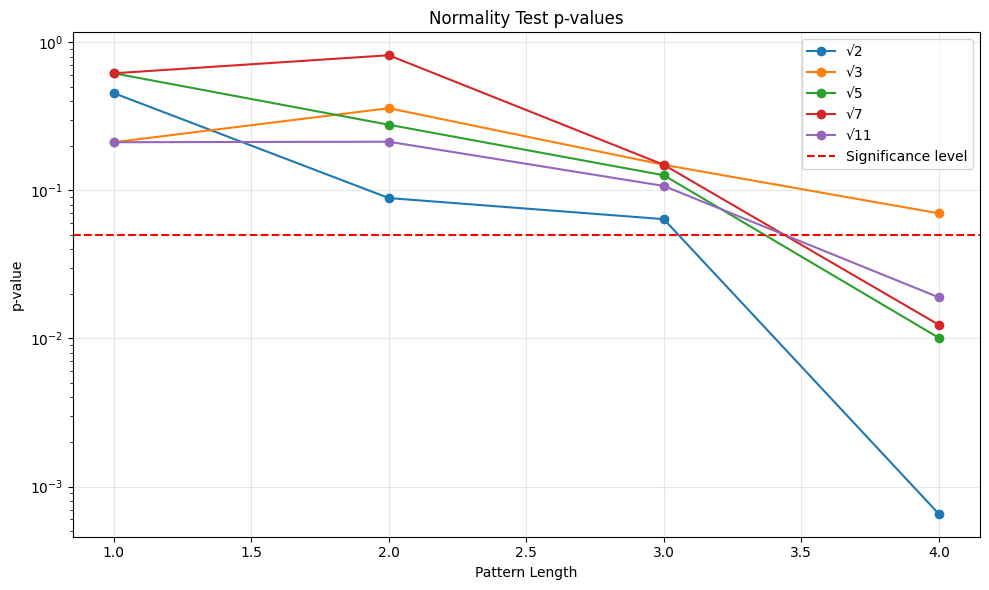

In [248]:
import pandas as pd

def testNormality(plot=True):
    numPrimes = 10
    bits = 64
    
    primes = getFirstNPrimes(numPrimes)
    fractions = [fractionalBitsOfSqrt(p, bits) for p in primes]
    
    print(f"Testing normality for {numPrimes} primes, {bits} bits each")
    
    # In a normal number, all n-bit sequences appear with equal frequency
    results = []
    
    # Test with different pattern lengths
    for patternLen in [1, 2, 3, 4]:
        print(f"\nPattern length: {patternLen}")
        
        for i, (prime, fraction) in enumerate(zip(primes[:5], fractions[:5])):
            possiblePatterns = 2**patternLen
            expectedCount = (bits - patternLen + 1) / possiblePatterns
            
            # Count actual occurrences
            patternCounts = {}
            for j in range(bits - patternLen + 1):
                pattern = fraction[j:j+patternLen]
                patternCounts[pattern] = patternCounts.get(pattern, 0) + 1
            
            # Calculate chi-square statistic
            chi2 = sum((count - expectedCount)**2 / expectedCount 
                      for count in patternCounts.values())
            
            dof = possiblePatterns - 1
            pValue = 1 - stats.chi2.cdf(chi2, dof)
            
            print(f"  √{prime}:")
            print(f"    Chi-square: {chi2:.4f}, p-value: {pValue:.6f}")
            print(f"    {'Normal' if pValue > 0.05 else 'Not normal'}")
            
            results.append((prime, patternLen, chi2/dof, pValue))
    
    # Check combined sequence
    allBits = ''.join(fractions)
    print("\nOverall normality (combined sequence):")
    
    for patternLen in [1, 2, 3, 4]:
        possiblePatterns = 2**patternLen
        expectedCount = (len(allBits) - patternLen + 1) / possiblePatterns
        
        # Count patterns
        patternCounts = {}
        for j in range(len(allBits) - patternLen + 1):
            pattern = allBits[j:j+patternLen]
            patternCounts[pattern] = patternCounts.get(pattern, 0) + 1
        
        # Chi-square test
        chi2 = sum((count - expectedCount)**2 / expectedCount 
                  for count in patternCounts.values())
        
        dof = possiblePatterns - 1
        pValue = 1 - stats.chi2.cdf(chi2, dof)
        
        print(f"  {patternLen}-bit patterns:")
        print(f"    Chi-square: {chi2:.4f}, p-value: {pValue:.6f}")
        print(f"    Normality ratio: {chi2/dof:.4f}")
        print(f"    {'Normal' if pValue > 0.05 else 'Not normal'}")
    
    if plot and results:
        # Plot p-values for different pattern lengths
        df = pd.DataFrame(results, columns=['Prime', 'PatternLength', 'ChiSquareRatio', 'pValue'])
        
        plt.figure(figsize=(10, 6))
        for prime in primes[:5]:
            primeData = df[df['Prime'] == prime]
            if not primeData.empty:
                plt.plot(primeData['PatternLength'], primeData['pValue'], 
                         'o-', label=f"√{prime}")
                
        plt.axhline(y=0.05, color='r', linestyle='--', label='Significance level')
        plt.xlabel('Pattern Length')
        plt.ylabel('p-value')
        plt.yscale('log')
        plt.title('Normality Test p-values')
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.savefig("test7_normality.png")
    
    print()

testNormality()

## Task 6: Proof of Work

maybe redo this,, other lads got better results in discord

In [ ]:
import hashlib

def loadWords(path="words.txt"):
    with open(path, "r") as file:
        return [line.strip().lower() for line in file if line.strip().isalpha()]

def calculateSha256(word):
    return hashlib.sha256(word.encode()).digest()

def countLeadingZeroBits(digestBytes):
    leadingZeros = 0
    
    for byte in digestBytes:
        if byte == 0:
            leadingZeros += 8
        else:
            byteBin = format(byte, '08b')
            for bit in byteBin:
                if bit == '0':
                    leadingZeros += 1
                else:
                    return leadingZeros
    
    return leadingZeros

def findWordsWithMaxLeadingZeros(words):
    maxZeros = 0
    bestWords = []
    
    for word in words:
        digest = calculateSha256(word)
        zeros = countLeadingZeroBits(digest)
        
        if zeros > maxZeros:
            maxZeros = zeros
            bestWords = [(word, digest.hex(), zeros)]
        elif zeros == maxZeros:
            bestWords.append((word, digest.hex(), zeros))
            
    return bestWords

words = loadWords()
bestWords = findWordsWithMaxLeadingZeros(words)

print(f"Words with maximum leading zeros ({bestWords[0][2]}):")
for word, digest, zeros in sorted(bestWords, key=lambda x: x[0]):
    print(f"- {word}: {digest}, leadingZeros: {zeros}")

Words with maximum leading zeros (15):
- grady: 00015674232002d9293d38e1da786f88f5eb55cdaca0a9186a8de3817663ab6c, leadingZeros: 15
- mountable: 00019347bddcfe0cd6b54f6751d9928518ad1acff8c8489f14fb834da3795f64, leadingZeros: 15


## Task 7: Turing Machines

In [244]:
def addOneTuringMachine(inputTape):
    tape = list(inputTape)
    headPosition = len(tape) - 1
    state = 'add'
    
    while True:
        currentSymbol = tape[headPosition]
        
        if state == 'add':
            if currentSymbol == '0':
                tape[headPosition] = '1'
                break
            elif currentSymbol == '1':
                tape[headPosition] = '0'
                state = 'carry'
                headPosition -= 1
            
        elif state == 'carry':
            if headPosition < 0:
                tape.insert(0, '1')
                break
            elif currentSymbol == '0':
                tape[headPosition] = '1'
                break
            elif currentSymbol == '1':
                tape[headPosition] = '0'
                headPosition -= 1
    
    return ''.join(tape)

## Task 8: Computational Complexity

In [245]:
def bubbleSort(arr):
    # Create a copy of the array to avoid modifying the original
    arrCopy = arr.copy()
    n = len(arrCopy)
    comparisons = 0
    
    # Traverse through all array elements
    for i in range(n):
        # Flag to optimize if no swaps occur in a pass
        swapped = False
        # Last i elements are already in place
        for j in range(0, n-i-1):
            # Compare adjacent elements
            comparisons += 1
            if arrCopy[j] > arrCopy[j+1]:
                # Swap if the element found is greater than the next element
                arrCopy[j], arrCopy[j+1] = arrCopy[j+1], arrCopy[j]
                swapped = True
        
        # If no swapping occurred in this pass, array is sorted
        if not swapped:
            break
                
    return arrCopy, comparisons